In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'traffic-sign-dataset-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1794080%2F2952603%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240519%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240519T125418Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3ccd9082b03054d01b0d9188c5de0976b1fe4543a285b885bcf743e8e7edd4f939bd9fad6e0b35ca106cfb1a9cf7613a80e97d3c48657a0fb0aeb40f0f76c09b49842f47082d68d5afff398a9e45c32328543271a5e3479ff51fd4c8eb761d10f2eef15666ee23ea1598292d04d4a0cc4de720a6db2a28460e941cde1c28e38c93dbe5f5e9f33ad1ca0df16a3581cb6858edb8d6e184584149609dd1b0a2d31e54f9a57dd0e5c492e9c3aced2ccbe866018dcb79cca63227062548a03729e046ae7daf01091db8443667dc478e35d399cec0f98cebdf0414573379d23451f50c95b4763e02359c120148e5110571e0cc870675d7293f4e10c58370017ff0cb4e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
datadir='/kaggle/input/traffic-sign-dataset-classification/traffic_Data'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets
import torchvision.transforms as T
from IPython.display import Image
from skimage import io
from torchvision.utils import make_grid

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
transforms = [T.Resize((256,256)),
              T.ToTensor()]
transform = T.Compose(transforms)

In [ ]:
dataset=datasets.ImageFolder(datadir,transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

trainset, testset = random_split(dataset=dataset,
                                 lengths=[train_size, test_size])

In [ ]:
batch_size=64 # размер пакета
train_loader = DataLoader(trainset, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=True )

dataloaders = {"train": train_loader,"validation": test_loader}

torch.Size([64, 3, 256, 256])
tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])


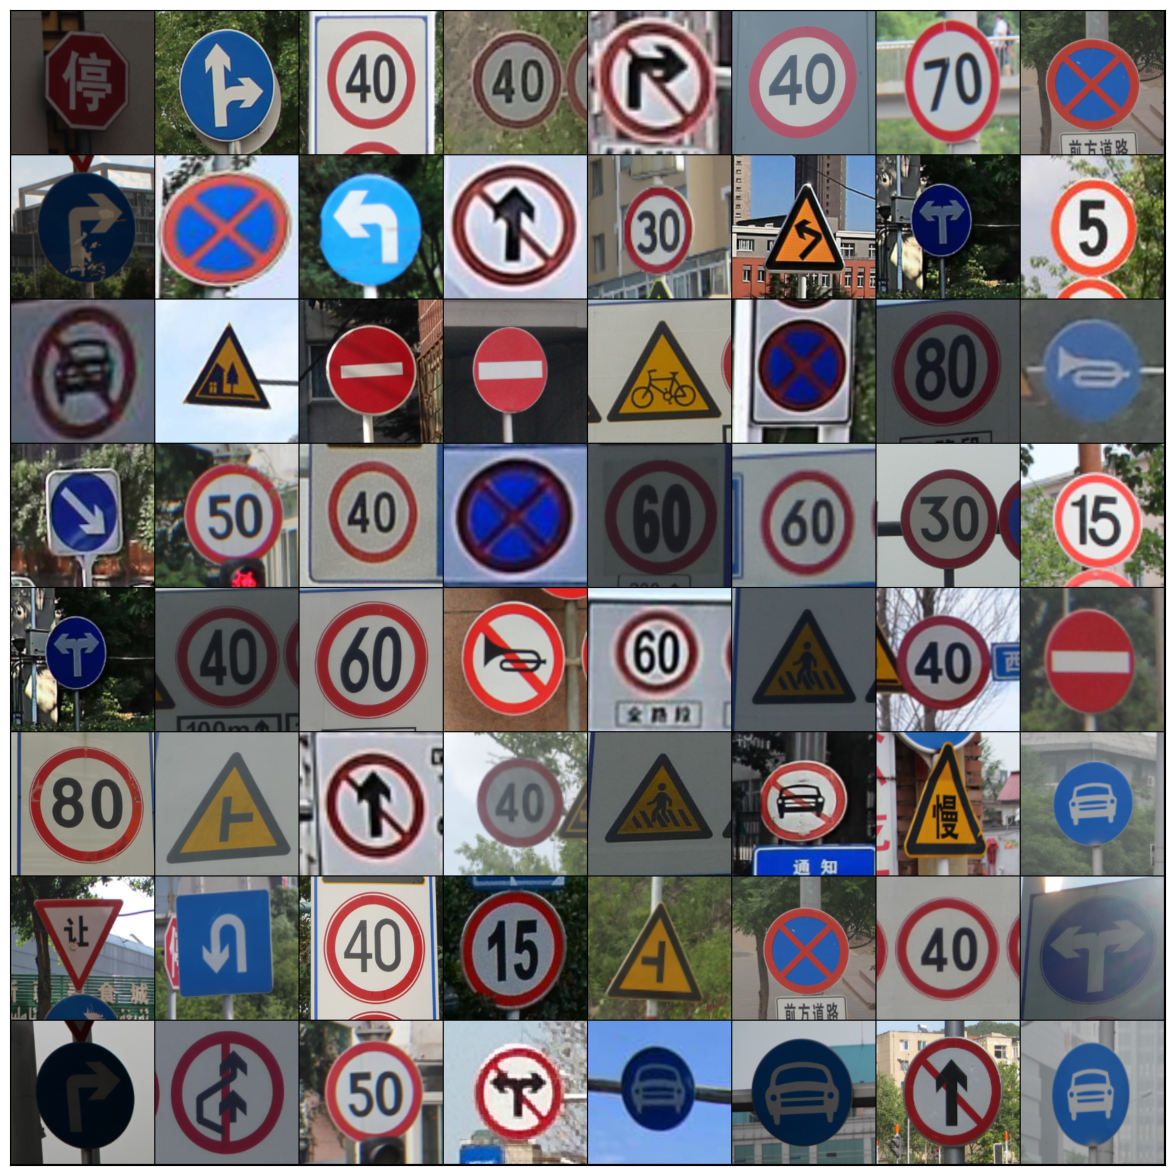

In [ ]:
for images, labels in train_loader:
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        print(images.shape)
        print(labels[:64])
        break

In [ ]:
! pip install torchinfo

In [ ]:
! pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=9adff2bd804736f8e4c93ed06bdc85268ef71b0393fbabff40d9c3373d911541
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


In [ ]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0')
model._fc=nn.Linear(1280,58)
model.to(device);

Loaded pretrained weights for efficientnet-b0


In [ ]:
! pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model,input_size=(64, 3, 256, 256))

Layer (type:depth-idx)                             Output Shape              Param #
EfficientNet                                       [64, 58]                  --
├─Conv2dStaticSamePadding: 1-1                     [64, 32, 128, 128]        864
│    └─ZeroPad2d: 2-1                              [64, 3, 257, 257]         --
├─BatchNorm2d: 1-2                                 [64, 32, 128, 128]        64
├─MemoryEfficientSwish: 1-3                        [64, 32, 128, 128]        --
├─ModuleList: 1-4                                  --                        --
│    └─MBConvBlock: 2-2                            [64, 16, 128, 128]        --
│    │    └─Conv2dStaticSamePadding: 3-1           [64, 32, 128, 128]        288
│    │    └─BatchNorm2d: 3-2                       [64, 32, 128, 128]        64
│    │    └─MemoryEfficientSwish: 3-3              [64, 32, 128, 128]        --
│    │    └─Conv2dStaticSamePadding: 3-4           [64, 8, 1, 1]             264
│    │    └─MemoryEfficientSwish

In [ ]:
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [ ]:
!pip install pytorch-ignite --quiet

In [ ]:
from ignite.engine import Events, create_supervised_evaluator, create_supervised_trainer
from ignite.metrics import Loss, Accuracy, RunningAverage, ConfusionMatrix
from ignite.handlers import EarlyStopping, ModelCheckpoint, Checkpoint, global_step_from_engine
from ignite.contrib.handlers import ProgressBar, HandlersTimeProfiler

Создаем движок для обучения и задаем метрики

In [ ]:
trainer = create_supervised_trainer(model=model,
                                    optimizer=optimizer,
                                    loss_fn=criterion,
                                    device=device)
metrics = {'loss': Loss(criterion),
           'accuracy': Accuracy(),
           'cm': ConfusionMatrix(num_classes=58)}

Задаем вычисление метрик

In [ ]:
train_evaluator = create_supervised_evaluator(model, device=device, metrics=metrics)
test_evaluator = create_supervised_evaluator(model, device=device, metrics=metrics)

training_history = {'accuracy':[],'loss':[]}
test_history = {'accuracy':[],'loss':[]}
last_epoch = []

In [ ]:
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(trainer):
    train_evaluator.run(train_loader)
    metrics = train_evaluator.state.metrics
    accuracy = metrics['accuracy']*100
    loss = metrics['loss']
    last_epoch.append(0)
    training_history['accuracy'].append(accuracy)
    training_history['loss'].append(loss)
    print(f"Результат обучения - Эпоха: {trainer.state.epoch}  Сред. точность: {accuracy :.3f} Сред. ошибка: {loss :.3f}")

In [ ]:
@trainer.on(Events.EPOCH_COMPLETED)
def log_test_results(trainer):
    test_evaluator.run(test_loader)
    metrics = test_evaluator.state.metrics
    accuracy = metrics['accuracy']*100
    loss = metrics['loss']
    test_history['accuracy'].append(accuracy)
    test_history['loss'].append(loss)
    print(f"Результат валидации - Эпоха: {trainer.state.epoch}  Сред. точность: {accuracy :.3f} Сред. ошибка: {loss :.3f}")

In [ ]:
from tqdm.notebook import tqdm
profiler = HandlersTimeProfiler()
profiler.attach(trainer)
pbar = ProgressBar(persist=True,
    bar_format = '')
pbar.attach(trainer, output_transform = lambda x : {"loss" : x})

In [ ]:
to_save = {'model': model}
saver = Checkpoint(
    to_save, './models',
    n_saved=1, filename_prefix='best',
    score_name="accuracy",
    global_step_transform=global_step_from_engine(trainer),
)
test_evaluator.add_event_handler(Events.COMPLETED, saver);

In [ ]:
trainer.run(train_loader, max_epochs=10)

  1%|1         | 1/78 [00:00<?, ?it/s]

Результат обучения - Эпоха: 1  Сред. точность: 67.796 Сред. ошибка: 1.975
Результат валидации - Эпоха: 1  Сред. точность: 67.072 Сред. ошибка: 2.071


  1%|1         | 1/78 [00:00<?, ?it/s]

Результат обучения - Эпоха: 2  Сред. точность: 82.965 Сред. ошибка: 0.425
Результат валидации - Эпоха: 2  Сред. точность: 80.697 Сред. ошибка: 0.523


  1%|1         | 1/78 [00:00<?, ?it/s]

Результат обучения - Эпоха: 3  Сред. точность: 88.278 Сред. ошибка: 0.272
Результат валидации - Эпоха: 3  Сред. точность: 86.537 Сред. ошибка: 0.359


  1%|1         | 1/78 [00:00<?, ?it/s]

Результат обучения - Эпоха: 4  Сред. точность: 91.401 Сред. ошибка: 0.287
Результат валидации - Эпоха: 4  Сред. точность: 87.997 Сред. ошибка: 0.418


  1%|1         | 1/78 [00:00<?, ?it/s]

Результат валидации - Эпоха: 5  Сред. точность: 91.322 Сред. ошибка: 0.222


  1%|1         | 1/78 [00:00<?, ?it/s]

Результат обучения - Эпоха: 6  Сред. точность: 90.529 Сред. ошибка: 0.225
Результат валидации - Эпоха: 6  Сред. точность: 86.942 Сред. ошибка: 0.337


  1%|1         | 1/78 [00:00<?, ?it/s]

Результат обучения - Эпоха: 7  Сред. точность: 94.322 Сред. ошибка: 0.166
Результат валидации - Эпоха: 7  Сред. точность: 91.890 Сред. ошибка: 0.298


  1%|1         | 1/78 [00:00<?, ?it/s]

Результат обучения - Эпоха: 8  Сред. точность: 94.687 Сред. ошибка: 0.128
Результат валидации - Эпоха: 8  Сред. точность: 91.241 Сред. ошибка: 0.184


  1%|1         | 1/78 [00:00<?, ?it/s]

Результат обучения - Эпоха: 9  Сред. точность: 95.376 Сред. ошибка: 0.095
Результат валидации - Эпоха: 9  Сред. точность: 93.512 Сред. ошибка: 0.159


  1%|1         | 1/78 [00:00<?, ?it/s]

Результат обучения - Эпоха: 10  Сред. точность: 95.275 Сред. ошибка: 0.105
Результат валидации - Эпоха: 10  Сред. точность: 92.782 Сред. ошибка: 0.160


State:
	iteration: 780
	epoch: 10
	epoch_length: 78
	max_epochs: 10
	output: 0.0025539270136505365
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

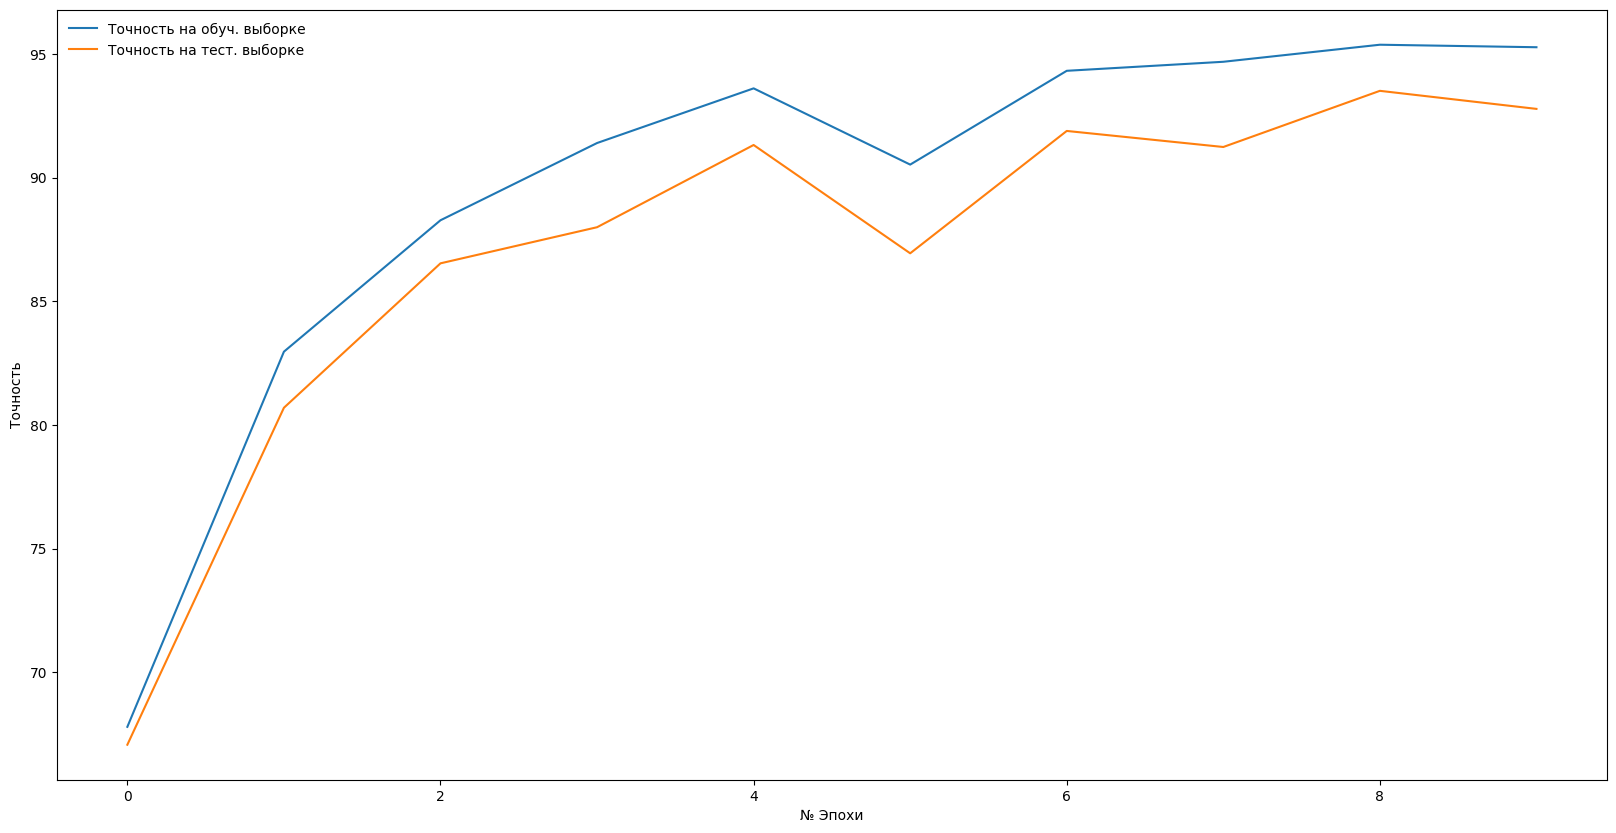

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(training_history['accuracy'],label="Точность на обуч. выборке")
plt.plot(test_history['accuracy'],label="Точность на тест. выборке")
plt.xlabel('№ Эпохи')
plt.ylabel('Точность')
plt.legend(frameon=False)
plt.show()

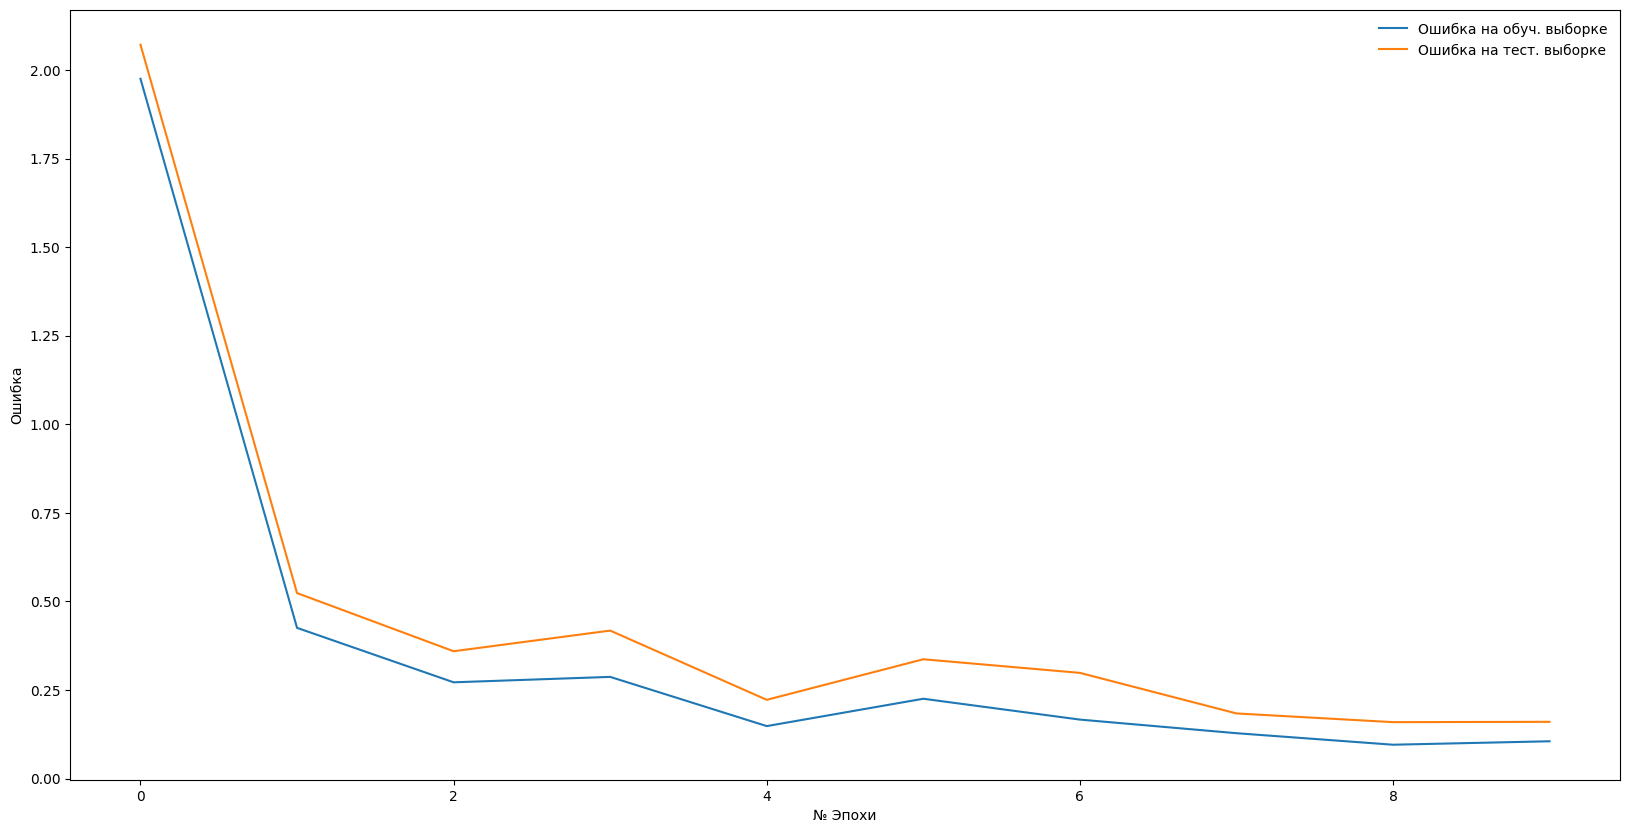

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(training_history['loss'],label="Ошибка на обуч. выборке")
plt.plot(test_history['loss'],label="Ошибка на тест. выборке")
plt.xlabel('№ Эпохи')
plt.ylabel('Ошибка')
plt.legend(frameon=False)
plt.show()